$\rm HI$-to-$\rm H_2$ transition

Estimate far UV radiation field:<br>
from theory (Wolfire et al. 2003) or from observations (dust temperature)

Midplane FUV intensity (relative to sun)<br>
from Wolfire et al. 2003:

In [1]:
import numpy as np
def J_FUV_rel(R,R0,H_R) :
    return np.exp(-(R-R0)/H_R)

In [2]:
J_FUV = J_FUV_rel(12,8.5,4.1) #Wolfire et al. 2003; midplane UV

In [3]:
J_FUV

0.42585407574880685

Probably more of an upper limit, since Maggie is off the plane

In [4]:
########

Estimate metallicity (relative to sun) for timescales<br>
from Wolfire et al. 2003 (theory) and Giannetti et al. 2017 (obs.):

In [5]:
#from Wolfire 2003 table 2:
Z_w = 0.668 #for 11kpc Gal. distance

#from Giannetti 2017 Eq.2:
def gas_to_dust(R) :
    return 10**(0.087 * R + 1.44)

In [6]:
gtd = gas_to_dust(12)

In [88]:
gtd

304.7894989627983

In [89]:
#gas to dust ratio at sun's distance:
gtd_sun = 136

In [90]:
#relative gas to dust
gtd_rel = gtd/gtd_sun

In [91]:
#metallicity as inverse of gas to dust:
Z = 1/gtd_rel
print(Z)

0.4462095986338419


(probably lower off the plane?)

**Expected transition and $\alpha G$ parameter (from Sternberg et al. 2014; Bialy et al. 2017)**

In [92]:
def transition(alpha_G, sigma_g_tilde) : #with sigma_g_rel approx. 1
    return (6.71/sigma_g_tilde) * np.log((alpha_G/3.2)+1)

def alpha_G(J_FUV, n, sigma_g_tilde) : #with sigma_g_rel approx. 1
    return 2.0 * J_FUV * (30/n) * (9.9/(1+8.9*sigma_g_tilde))**0.37

In [93]:
n = np.arange(0.5,30,0.5)
sigma_g_tilde = Z
aG = alpha_G(J_FUV, n, sigma_g_tilde)
print(sigma_g_tilde)

0.4462095986338419


In [94]:
#aG

In [105]:
Sigma_HI = transition(aG, sigma_g_tilde)

In [106]:
#Sigma_HI

In [107]:
n0 = 5. #test
aG0 = alpha_G(J_FUV, n0, sigma_g_tilde)
Sigma_HI0 = transition(aG0, sigma_g_tilde)
print(aG0,Sigma_HI0)

6.593777739421313 16.821202861345586


In [109]:
Sigma_HI0 * sigma_g_tilde

7.505782177299447

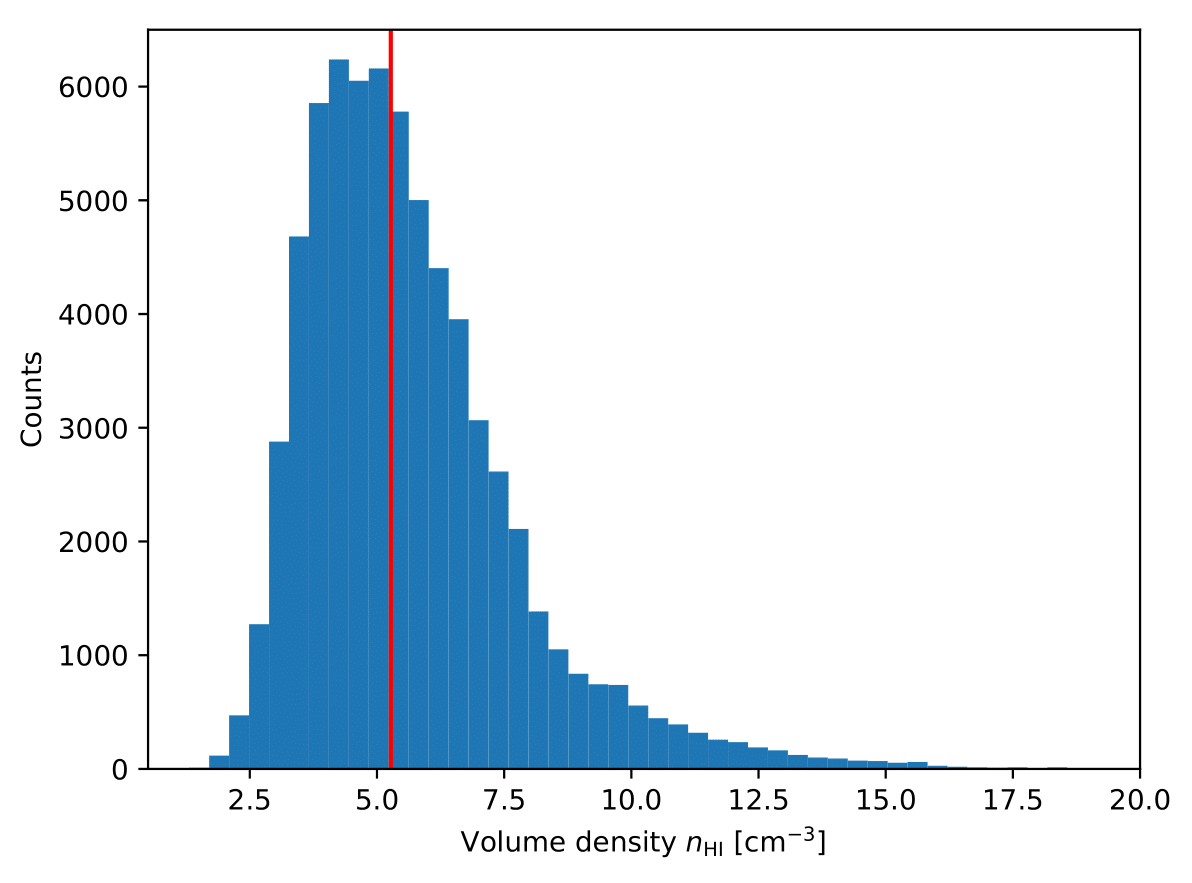

In [110]:
from IPython.display import Image

fig = Image(filename=('./voldens_Maggie.png'), width=500)
fig

In [116]:
#rough estimate of the volume density (homogeneous over whole filament tube of diameter 40pc)
#median at 5.1 cm-3
n1 = 3.5 #3.5 as lower limit
n2 = 8.3 #cm-3

In [117]:
aG1 = alpha_G(J_FUV, n1, sigma_g_tilde)
aG2 = alpha_G(J_FUV, n2, sigma_g_tilde)

HI1 = transition(aG1, sigma_g_tilde)
HI2 = transition(aG2, sigma_g_tilde)

print('aG1: {}'.format(aG1))
print('aG2: {}'.format(aG2))

print('HI1: {}'.format(HI1))
print('HI2: {}'.format(HI2))

aG1: 9.41968248488759
aG2: 3.9721552647116343
HI1: 20.633436040082213
HI2: 12.136318253223378


In [118]:
HI1*Z

9.206837213882132

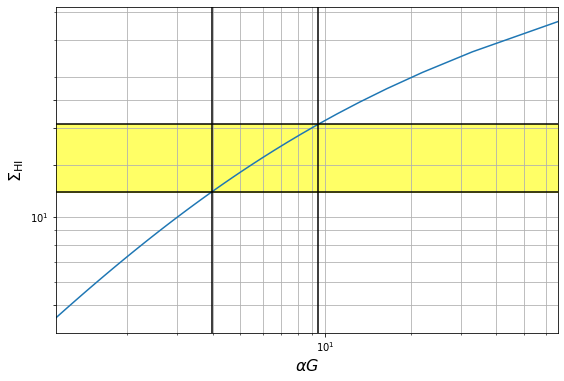

In [119]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(9,6))
ax.plot(aG,Sigma_HI)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(r'$\alpha G$', size=16)
ax.set_ylabel(r'$\Sigma_{\rm HI}$', size=16)
ax.grid(which='both')
xlims = ax.get_xlim()
ylims = ax.get_ylim()


ax.axvline(aG1, color='k')
ax.axvline(aG2, color='k')
ax.axhline(HI1, color='k')
ax.axhline(HI2, color='k')

yticks = np.arange(5,30,5)
ax.set_yticks(yticks)
ax.set_ylim(ylims[0],ylims[1])
ax.set_xlim(aG.min(),aG.max())

ax.fill_between(aG,HI1,HI2,color='yellow', alpha=0.6)

In [120]:
print('HI to H2 transition between {:.1f} - {:.1f} M_sol'.format(HI2,HI1))

HI to H2 transition between 12.1 - 20.6 M_sol


**What about clumpiness? This should increase volume density toward clumps and therefore decrease aG (at fixed UV).**<br>
**Maggie is not only CNM (mixture or in unstable phase?), but we would expect a transition to $\rm H_2$ predominantly toward denser CNM clumps.**